In [1]:
import os
import sys
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import decomposition
# from sklearn.manifold import TSNE

lambert_crs = ccrs.LambertConformal(
    central_longitude=-107.0,
    central_latitude=50.0,
    standard_parallels=[50.0, 50.0],
    false_easting=5632642.22547,
    false_northing=4612545.65137
)

In [2]:
directory_path = "/Users/eliotcarlson/Desktop/columbia/capstone/weatherregimes/assets/all"
file_list = [os.path.join(directory_path, f) for f in os.listdir(directory_path)]

datasets = [xr.open_dataset(file) for file in file_list]

data = xr.merge(datasets)

In [3]:
data = data.stack(placetime=('y', 'x', 'time'))
data = data.to_stacked_array("var-lvl",sample_dims=["placetime"])
coordinates = data.coords

X = data[~np.isnan(data).any(axis=1)]

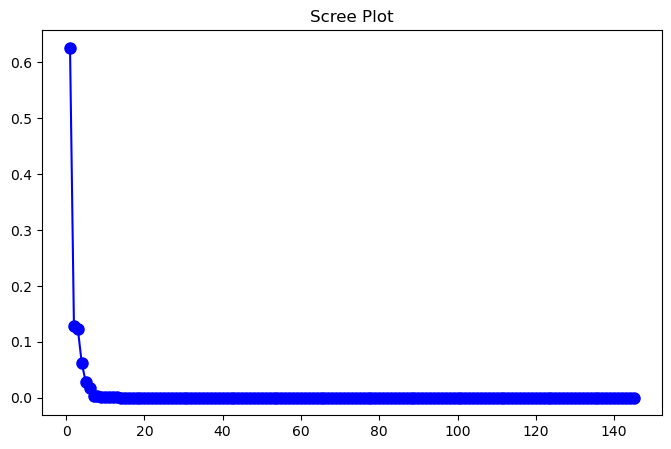

In [4]:
full_pca = decomposition.PCA()
full_pca.fit(X)

explained_variance = full_pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, 'o-', markersize=8, color='blue', label='Explained Variance')
plt.title('Scree Plot')
plt.show()